In [1]:
import music21
import pathlib
music21.environment.set('musescoreDirectPNGPath', 
                        pathlib.PosixPath('/Applications/MuseScore 4.app/Contents/MacOS/mscore'))
from music21 import *
# c = converter.parse('/Users/cuthbert/Desktop/myXML.xml')
# XML pushing
# url = 'https://kern.ccarh.org/cgi-bin/ksdata?l=cc/bach/cello&file=bwv1007-01.krn&f=xml'
# sAlt = converter.parse(url)
# sAlt.measures(1, 5).show()

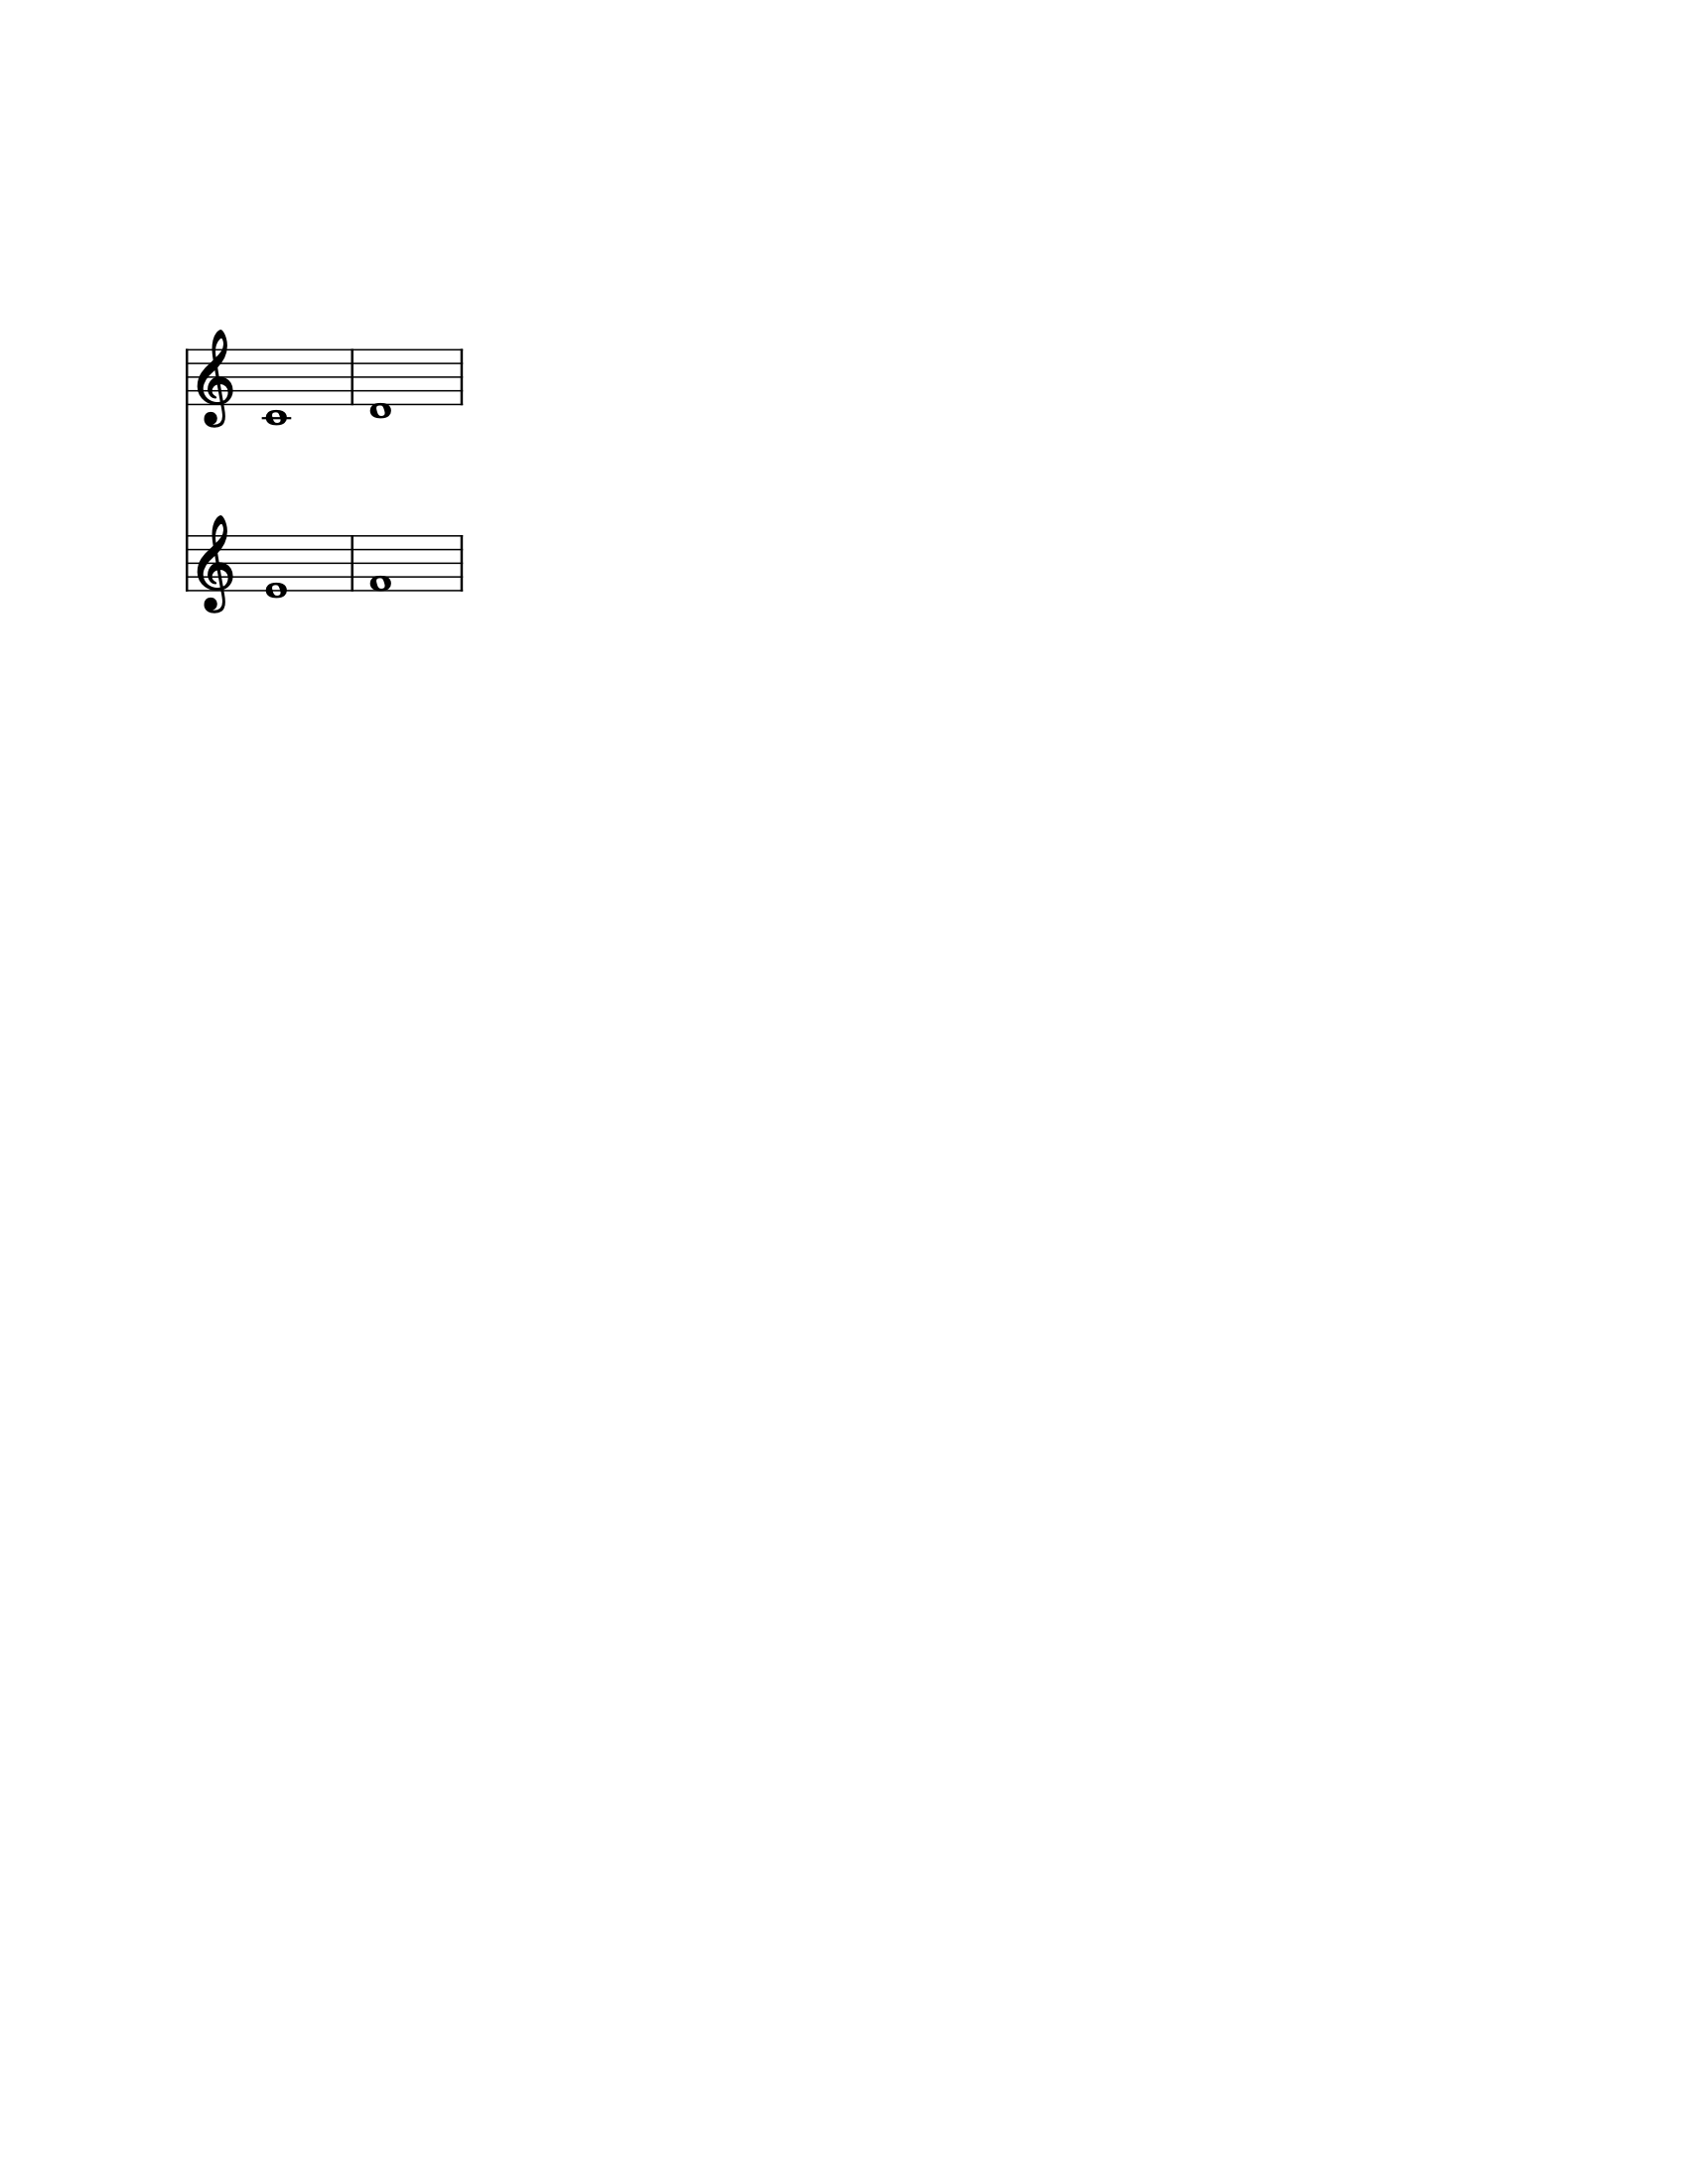

In [2]:
s = stream.Score(id='mainScore')
p0 = stream.Part(id='part0')
p1 = stream.Part(id='part1')

m01 = stream.Measure(number=1)
m01.append(note.Note('C', type="whole"))
m02 = stream.Measure(number=2)
m02.append(note.Note('D', type="whole"))
p0.append([m01, m02])

m11 = stream.Measure(number=1)
m11.append(note.Note('E', type="whole"))
m12 = stream.Measure(number=2)
m12.append(note.Note('F', type="whole"))
p1.append([m11, m12])

s.insert(0, p0)
s.insert(0, p1)
s.show()

In [3]:
note1 = note.Note("C4")
note2 = note.Note("F#4")
note1.duration.type = 'half'
note1.duration.quarterLength
note2.duration.quarterLength

1.0

In [9]:
print(note1.step)
print(note2.step)
noteList = [note1, note2]
print(noteList)
note3 = note.Note("B-2")
noteList.append(note3)
for thisNote in noteList:
    print(thisNote.step)
noteList.append(note3)
noteList.index(note2)




C
F
[<music21.note.Note C>, <music21.note.Note F#>]
C
F
B


1

In [10]:
noteList[-1]
noteList[-1] is noteList[2]
# The Stream object and its subclasses 
# (Score, Part, Measure) are the fundamental 
# containers for music21 objects such as 
# Note, Chord, Clef, TimeSignature objects.
# For examples, we might have numerous
#  Measure Streams contained in a Part Stream.
#  If we extract a region of this Part 
# (using the measures() method),
#  we get a new Stream containing
#  the specified Measures and
#  the contained notes. 

#(If you want to put an object that’s not a Music21Object in a Stream, put it in an ElementWrapper.)


True

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


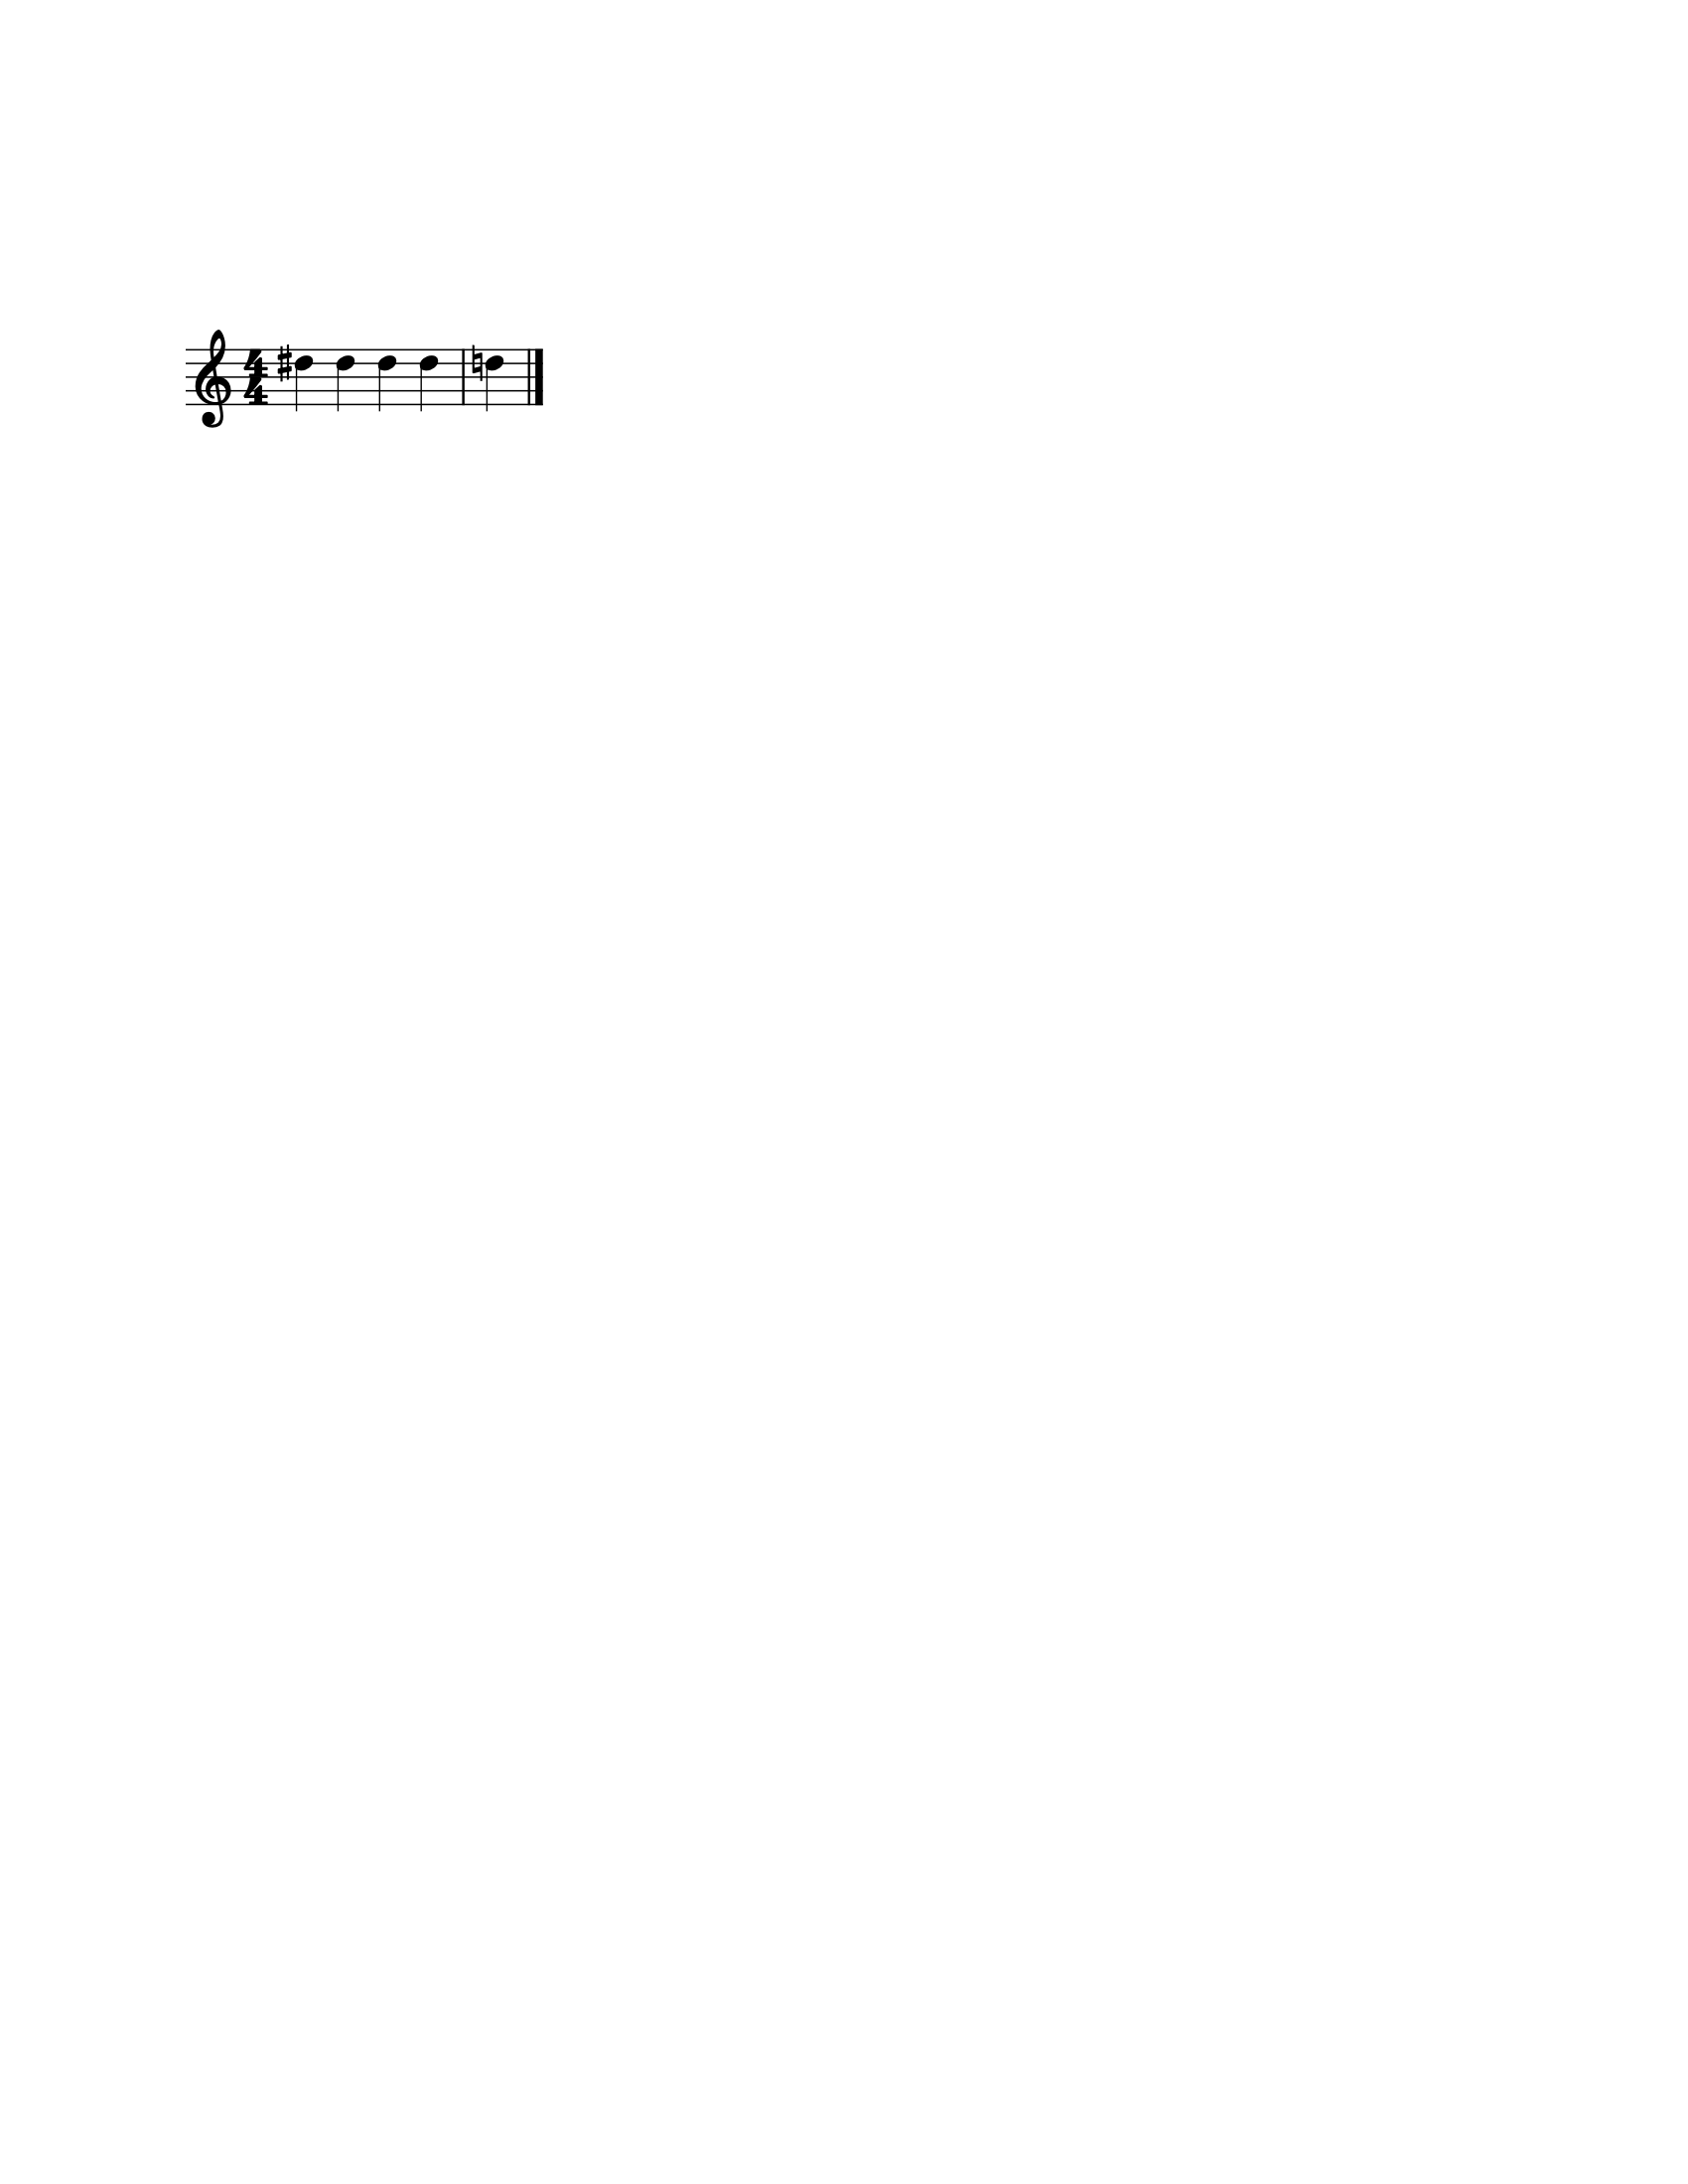

C
F
B


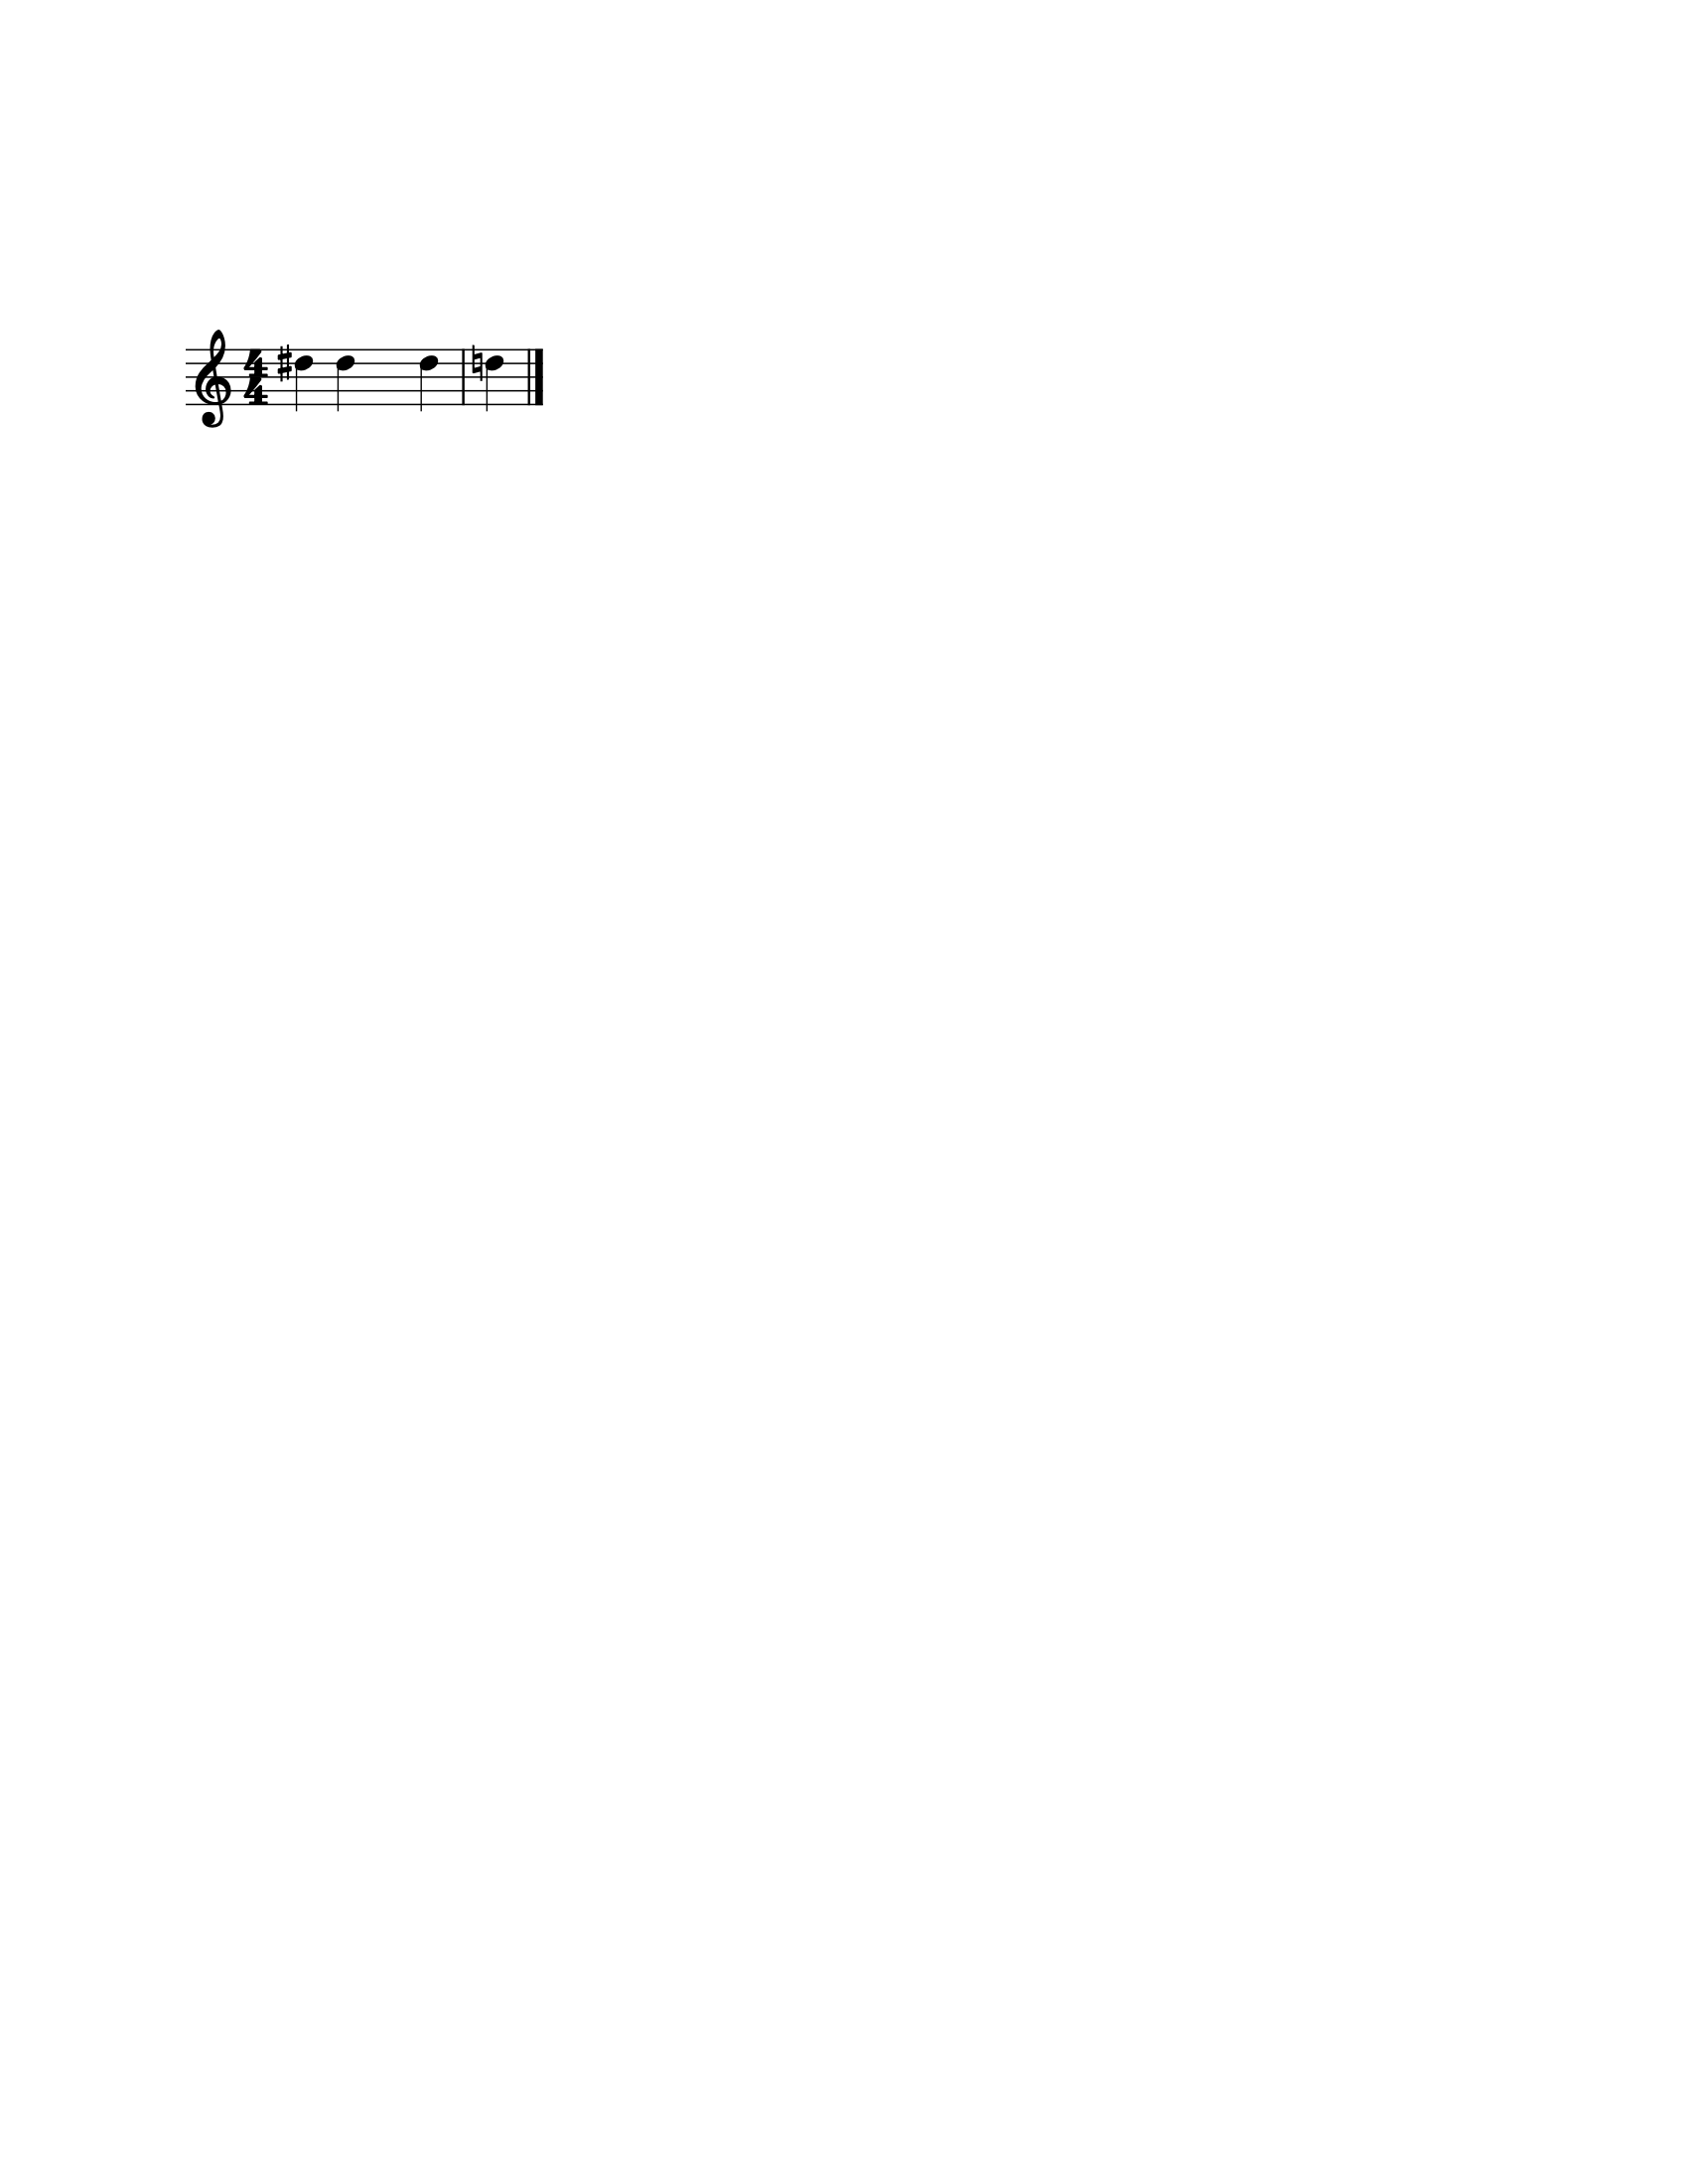

In [16]:
stream1 = stream.Stream()
stream1.append(note1)
stream1.append(note2)
stream1.append(note3)
stream1.show('text')
len(stream1)
stream2 = stream.Stream()
n3 = note.Note('D#5')  # octave values can be included in creation arguments
stream2.repeatAppend(n3, 4)
n4 = note.Note('D5')
stream2.append(n4)
stream2.show()
for thisNote in stream1:
    print(thisNote.step)
note3Index = stream1.index(note3)
stream2[0]
stream2.pop(note3Index)
stream2.show()



In [17]:
for thisNote in stream1.getElementsByClass(note.Note):
    print(thisNote, thisNote.offset)


<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


In [18]:
for thisNote in stream1.getElementsByClass('Note'):
    print(thisNote, thisNote.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


In [19]:
for thisNote in stream1.getElementsByClass(['Note', 'Rest']):
    print(thisNote, thisNote.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


In [20]:
for thisNote in stream1.notesAndRests:
    print(thisNote)

<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note B->


In [21]:
sIterator = stream1.getElementsByClass(note.Note)
sOut = sIterator.stream()
sOut.show('text')

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


In [23]:
sOut = stream1.getElementsByOffset(2, 3).stream()
sOut.show('text')

{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


In [25]:
stream1.analyze('ambitus')
note3.offset
note2.offset
note1.offset
for thisNote in stream1:
    print(thisNote.offset, thisNote.name)



0.0

In [28]:
stream1.show('midi')
print(defaults.meterNumerator)
print(defaults.meterDenominator)



4
quarter


In [34]:
stream1.id = 'some_notes'
stream1
note1.id = 'my_favorite_C'
note1
stream1.duration.quarterLength
stream1.duration.type
stream1.duration



<music21.duration.Duration 4.0>

In [37]:
biggerStream = stream.Stream()
note2 = note.Note("D#5")
biggerStream.insert(0, note2)
biggerStream.append(stream1)
biggerStream.append(stream2)
biggerStream.show('text')
print(note1 in stream1)
print(stream1 in biggerStream)



{0.0} <music21.note.Note D#>
{1.0} <music21.stream.Stream some_notes>
    {0.0} <music21.note.Note C>
    {2.0} <music21.note.Note F#>
    {3.0} <music21.note.Note B->
{5.0} <music21.stream.Stream 0x113636e60>
    {0.0} <music21.note.Note D#>
    {1.0} <music21.note.Note D#>
    {3.0} <music21.note.Note D#>
    {4.0} <music21.note.Note D>
True
True
